In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sns.set_style("whitegrid")

In [2]:
df = pd.read_excel("./data/Concrete_Data.xls")
df.columns = ["cement", "blast_furnace_slag", "fly_ash", "water", "superplasticizer", "coarse_aggregate", "fine_aggregate", "age", "strength"]
print(df.head(10))


   cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   
5   266.0               114.0      0.0  228.0               0.0   
6   380.0                95.0      0.0  228.0               0.0   
7   380.0                95.0      0.0  228.0               0.0   
8   266.0               114.0      0.0  228.0               0.0   
9   475.0                 0.0      0.0  228.0               0.0   

   coarse_aggregate  fine_aggregate  age   strength  
0            1040.0           676.0   28  79.986111  
1            1055.0           676.0   28  61.887366  
2             932.0           594.0  270  40.269535  
3             932.0           594.0  365  41.0

In [3]:
# details about the dataset
print(df.shape)
print(df.info())


(1030, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cement              1030 non-null   float64
 1   blast_furnace_slag  1030 non-null   float64
 2   fly_ash             1030 non-null   float64
 3   water               1030 non-null   float64
 4   superplasticizer    1030 non-null   float64
 5   coarse_aggregate    1030 non-null   float64
 6   fine_aggregate      1030 non-null   float64
 7   age                 1030 non-null   int64  
 8   strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB
None


In [4]:
print(df.describe())


            cement  blast_furnace_slag      fly_ash        water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.165631           73.895485    54.187136   181.566359   
std     104.507142           86.279104    63.996469    21.355567   
min     102.000000            0.000000     0.000000   121.750000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.270000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       superplasticizer  coarse_aggregate  fine_aggregate          age  \
count       1030.000000       1030.000000     1030.000000  1030.000000   
mean           6.203112        972.918592      773.578883    45.662136   
std            5.973492         77.753818       80.175427    63.169912   
min            0.000000        801.000000      594.000000     1.000000   
25%            0.

In [5]:
print(df.columns)


Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age', 'strength'],
      dtype='object')


In [6]:
print(df.isnull().sum())

cement                0
blast_furnace_slag    0
fly_ash               0
water                 0
superplasticizer      0
coarse_aggregate      0
fine_aggregate        0
age                   0
strength              0
dtype: int64


In [7]:
# removing the duplicats if any
df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")

Shape after removing duplicates: (1005, 9)


In [8]:
# checking if there is any null value
print(df.isnull().sum())

cement                0
blast_furnace_slag    0
fly_ash               0
water                 0
superplasticizer      0
coarse_aggregate      0
fine_aggregate        0
age                   0
strength              0
dtype: int64


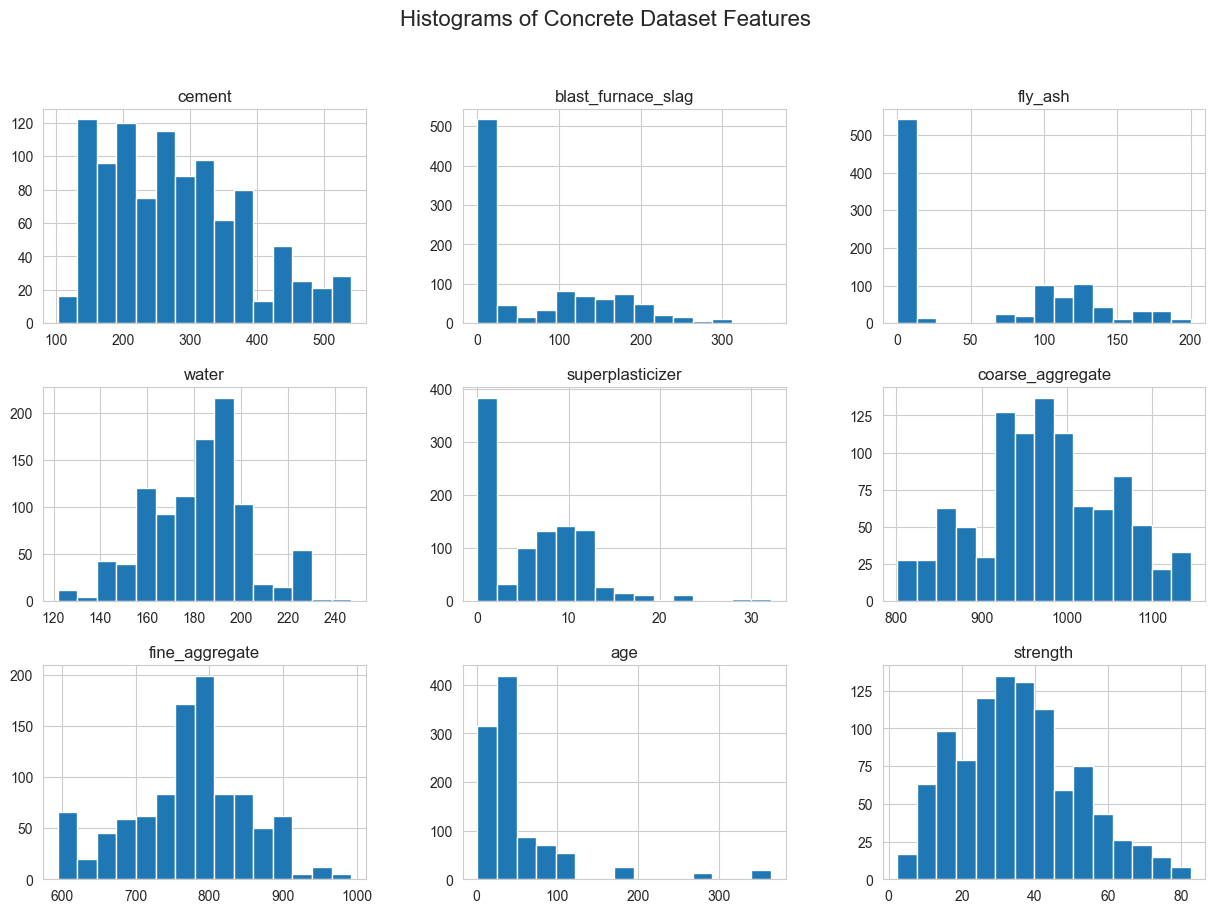

In [9]:
# histogram of all features
df.hist(bins=15, figsize=(15, 10))
plt.suptitle("Histograms of Concrete Dataset Features", fontsize=16)
plt.show()

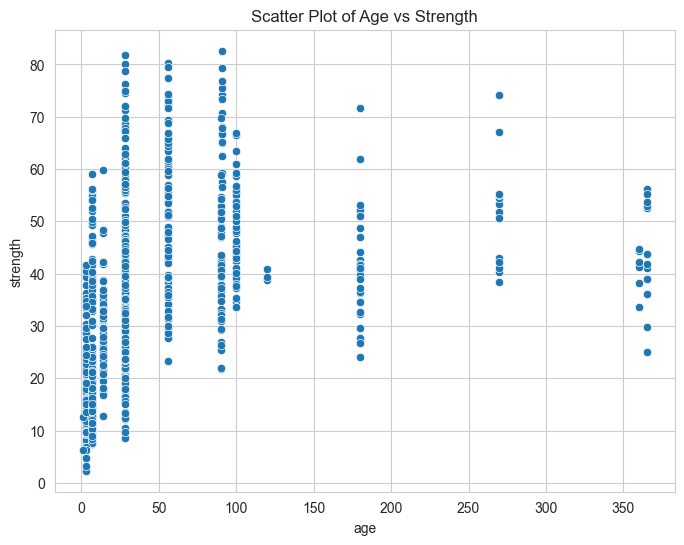

In [10]:
# scatter plot between age and strength
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="age", y="strength")
plt.title("Scatter Plot of Age vs Strength")
plt.show()
# from this picture we can see that there is no direct correlation between age and strength

In [11]:
# now lets make a linear model to predict the strength of concrete based on other features
# there is no need of scaling as there are no objects or categorical values neither outliers in the dataset
# removing the strength column from the features as our goal is to predict it
X = df.drop("strength", axis=1)
# target variable
y = df["strength"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [13]:
model.coef_, model.intercept_
# this gives us the coefficients for each feature and the intercept term

(array([ 0.11664731,  0.09804613,  0.08458992, -0.13173339,  0.33006847,
         0.01546812,  0.0206153 ,  0.11064647]),
 np.float64(-23.23283059615546))

In [14]:
y_pred = model.predict(X_test)
# print(y_pred)

In [15]:
# comparing actual vs predicted
comparison_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(comparison_df.head(10))

        Actual  Predicted
951  19.009543  23.456801
654  24.290929  16.705024
706  26.322815  22.458266
538  34.569637  37.403063
389  44.133359  42.877773
679  33.003837  22.158817
680  17.275511  14.611380
553  25.422359  44.524804
345  33.729166  33.292497
70   34.397958  50.125996


In [16]:
# now for evaluating the model performance
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred)
accuracy = model.score(X_test, y_test)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Mean Squared Error: 125.26533827672498
R^2 Score: 0.5801089019953831
Model Accuracy: 58.01%


In [17]:
# lets try to predict the strength for a new data point
# cement_name = input("Enter cement amount (kg/m^3): ")
# blast_furnace_slag_name = input("Enter blast furnace slag amount (kg/m^3): ")
# fly_ash_name = input("Enter fly ash amount (kg/m^3): ")
# water_name = input("Enter water amount (kg/m^3): ")
# superplasticizer_name = input("Enter superplasticizer amount (kg/m^3): ")
# coarse_aggregate_name = input("Enter coarse aggregate amount (kg/m^3): ")
# fine_aggregate_name = input("Enter fine aggregate amount (kg/m^3): ")
# age_name = input("Enter age (days): ")

# # Create new_data as a DataFrame with proper feature names
# new_data = pd.DataFrame({
#     "cement": [float(cement_name)],
#     "blast_furnace_slag": [float(blast_furnace_slag_name)],
#     "fly_ash": [float(fly_ash_name)],
#     "water": [float(water_name)],
#     "superplasticizer": [float(superplasticizer_name)],
#     "coarse_aggregate": [float(coarse_aggregate_name)],
#     "fine_aggregate": [float(fine_aggregate_name)],
#     "age": [float(age_name)]
# })

# predicted_strength = model.predict(new_data)
# print(f"The predicted concrete strength is: {predicted_strength[0]:.2f} MPa")
# Question: why did it give error while using numpy array instead of dataframe? 

In [18]:
# predict by giving some sample values
new_data = pd.DataFrame({
    "cement": [540.0],
    "blast_furnace_slag": [0.0],
    "fly_ash": [0.0],
    "water": [162.0],
    "superplasticizer": [2.5],
    "coarse_aggregate": [1040.0],
    "fine_aggregate": [676.0],
    "age": [28.0]
})
predicted_strength = model.predict(new_data)
print(f"The predicted concrete strength is: {predicted_strength[0]:.2f} MPa")

The predicted concrete strength is: 52.36 MPa
